# EXPLORATORY DATA ANALYSIS

*   Author: Sanjay S Rao
*   LinkedIn: https://www.linkedin.com/in/sanjay-s-rao04/
*   e-mail - sanjay.s.rao04@gmail.com

The Walmart dataset is accessed from Kaggle via the link
[link text](https://www.kaggle.com/yasserh/walmart-dataset)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from matplotlib import style 
from datetime import date
style.use('ggplot')

%matplotlib inline

In [2]:
data = pd.read_csv('Walmart.csv')

## Understanding the Dataset

This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file WalmartStoresales. Within this file you will find the following fields:

- Store - the store number
- Date - the week of sales
- Weekly_Sales - sales for the given store
- Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
- Temperature - Temperature on the day of sale
- Fuel_Price - Cost of fuel in the region
- CPI – Prevailing consumer price index
- Unemployment - Prevailing unemployment rate
- Holiday Events\
    Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13\
    Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13\
    Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13\
    Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [3]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
data.describe() 

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


### Checking for missing values

In [6]:
data.isnull().sum() 

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

We find that the data is already clean from missing values and needs no efforts to correct it.

### Exploratory Data Analysis

In [7]:
data.shape 

(6435, 8)

The dataset consists of 8 columns and 6435 rows

In [8]:
# Reframing the columns
data.Date=pd.to_datetime(data.Date)

data['weekday'] = data.Date.dt.weekday
data['month'] = data.Date.dt.month
data['year'] = data.Date.dt.year

data.drop(['Date'], axis=1, inplace=True)

In [9]:
data.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010


In [10]:
#Checking number of unique rows in each feature

data.nunique().sort_values()

Holiday_Flag       2
year               3
weekday            7
month             12
Store             45
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

In [11]:
target = 'Weekly_Sales'
features = [i for i in data.columns if i not in [target]]

In [12]:
#Checking number of unique rows in each feature

nu = data[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(data[features].shape[1]):
    if nu.values[i]<=45:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Dataset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Dataset has 4 numerical & 5 categorical features.


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


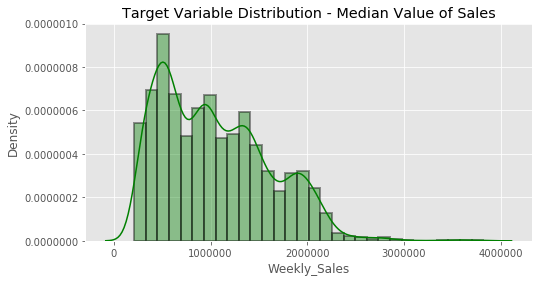

In [13]:
plt.figure(figsize=[8,4])
sns.distplot(data[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution - Median Value of Sales')
plt.show()

**Inference:** The Target Variable seems to be be normally distributed, averaging around 20 units.

                                                Numeric Features Distribution                                                 


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

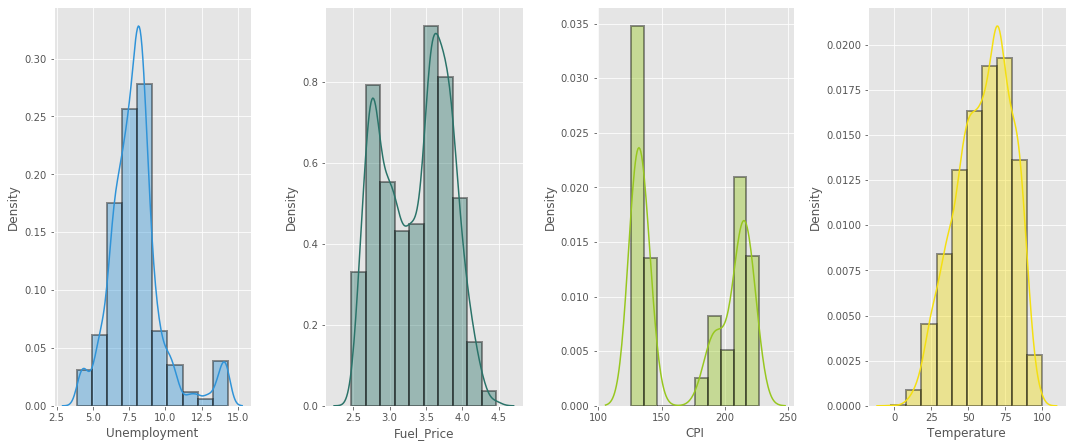

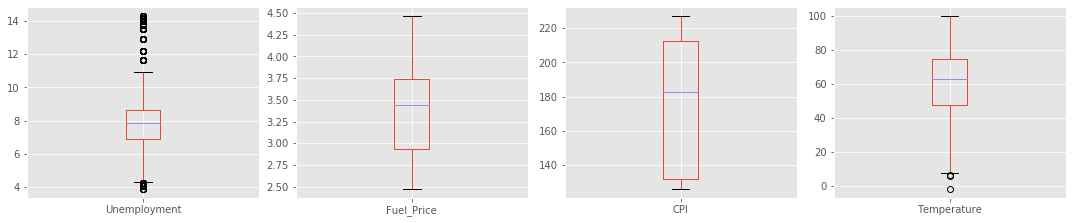

In [14]:
#Visualising the numeric features 

print('\033[1mNumeric Features Distribution'.center(130))

n=4

clr=['r','g','b','g','b','r']

plt.figure(figsize=[15,6*math.ceil(len(cf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    sns.distplot(data[nf[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,6*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    data.boxplot(nf[i])
plt.tight_layout()
plt.show()

We observe that 'CPI' values have great variability and 'Unemployment' shows less variability but contains many outliers. 

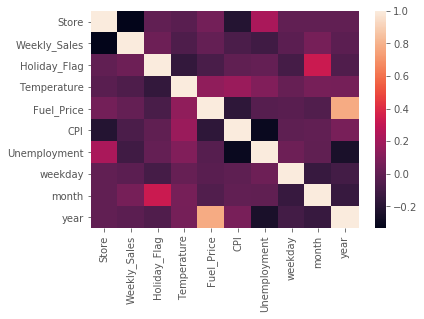

In [15]:
sns.heatmap(data.corr())

A heatmap will represent the correlation between the variables in our dataset.

To find the Store that recorded the highest sale

In [16]:
data.loc[data['Weekly_Sales'] ==  data['Weekly_Sales'].max()]

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
1905,14,3818686.45,0,30.59,3.141,182.54459,8.724,4,12,2010


### Average Sales in the year 2010

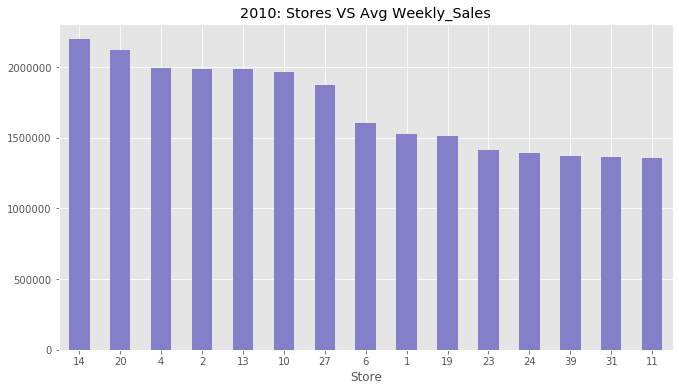

In [17]:
Avg_Sales_2010= data[data['year']==2010].groupby('Store')['Weekly_Sales'].mean().sort_values(ascending= False).head(15)
plt.figure(figsize=(11,6))
Avg_Sales_2010.plot.bar(title ='2010: Stores VS Avg Weekly_Sales', color= '#857fc9' )
plt.xticks(rotation=0)
plt.show()

### Average Sales in the year 2011

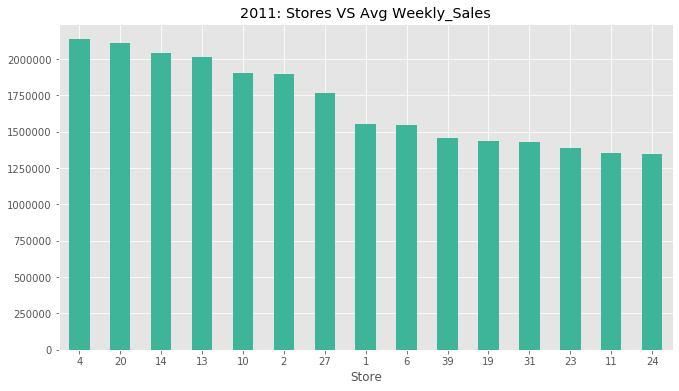

In [18]:
Avg_Sales_2011= data[data['year']==2011].groupby('Store')['Weekly_Sales'].mean().sort_values(ascending= False).head(15)
plt.figure(figsize=(11,6))
Avg_Sales_2011.plot.bar(title ='2011: Stores VS Avg Weekly_Sales', color= '#3eb599' )
plt.xticks(rotation=0)
plt.show()

### Average Sales in the year 2012

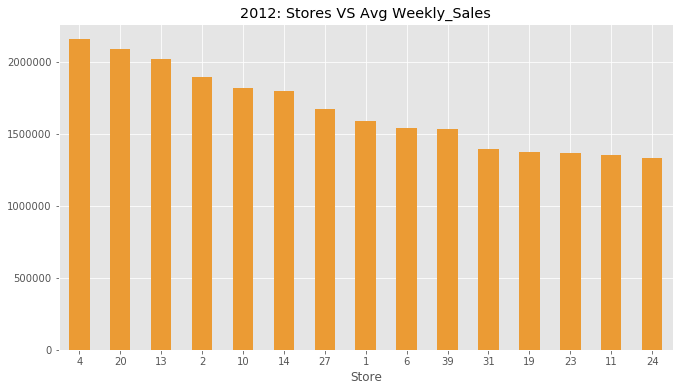

In [19]:
Avg_Sales_2012= data[data['year']==2012].groupby('Store')['Weekly_Sales'].mean().sort_values(ascending= False).head(15)
plt.figure(figsize=(11,6))
Avg_Sales_2012.plot.bar(title ='2012: Stores VS Avg Weekly_Sales', color= '#eb9b34' )
plt.xticks(rotation=0)
plt.show()

### Weekly_Sales during holidays!

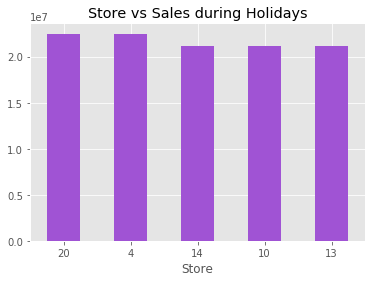

In [20]:
store_holidays_sales = data[data['Holiday_Flag']==1].groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(5)
store_holidays_sales.plot.bar(color='#a053d4', title='Store vs Sales during Holidays')
plt.xticks(rotation=0)
plt.show()

### Year with maximum sales

In [21]:
#Year with highest average sales
year_max_avg_sales = data.groupby('year')['Weekly_Sales'].mean().sort_values(ascending=False)
year_max_avg_sales

year
2010    1.059670e+06
2011    1.046239e+06
2012    1.033660e+06
Name: Weekly_Sales, dtype: float64

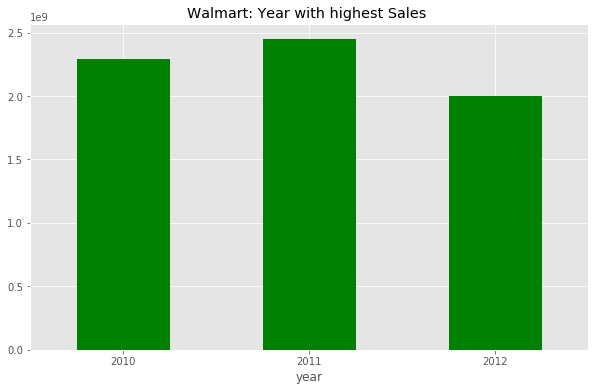

In [22]:
# Year with highest weekly_sales
plt.figure(figsize=(10,6))
data.groupby('year')['Weekly_Sales'].sum().plot.bar(x='Year', y='Weekly_Sales', title="Walmart: Year with highest Sales ", color='green')
plt.xticks(rotation=0)
plt.show()